In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/DSBDA/Dataset/airquality.csv")
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,24-11-2017,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,25-11-2017,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,26-11-2017,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,27-11-2017,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,28-11-2017,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [3]:
df.isnull().sum()

,0
StationId,0
Date,0
PM2.5,21625
PM10,42706
NO,17106
NO2,16547
NOx,15500
NH3,48105
CO,12998
SO2,25204


In [4]:
numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

In [5]:
categorical_cols = ['AQI_Bucket']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [6]:
df.isnull().sum()

,0
StationId,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


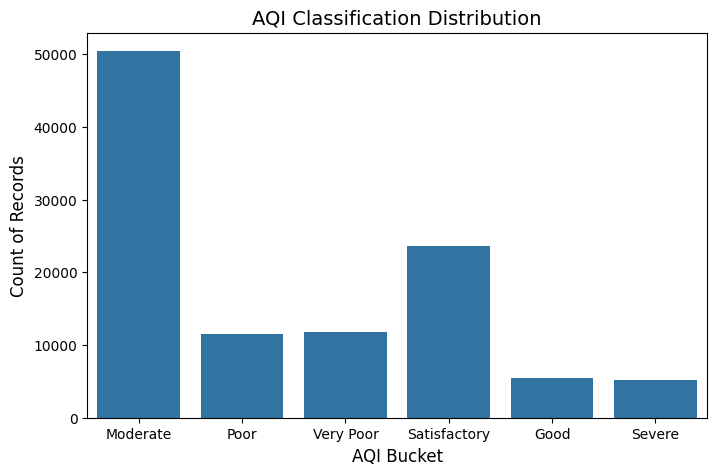

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='AQI_Bucket')
plt.title('AQI Classification Distribution', fontsize=14)
plt.xlabel('AQI Bucket', fontsize=12)
plt.ylabel('Count of Records', fontsize=12)
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x600 with 0 Axes>

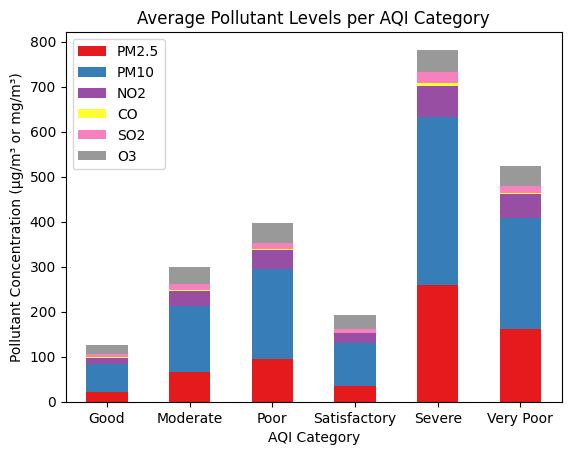

In [8]:
plt.figure(figsize=(12, 6))
grouped = df.groupby('AQI_Bucket')[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']].mean()
grouped.plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Average Pollutant Levels per AQI Category')
plt.ylabel('Pollutant Concentration (µg/m³ or mg/m³)')
plt.xlabel('AQI Category')
plt.xticks(rotation=0)
plt.show()


<ipython-input-11-022ff5801f5e>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


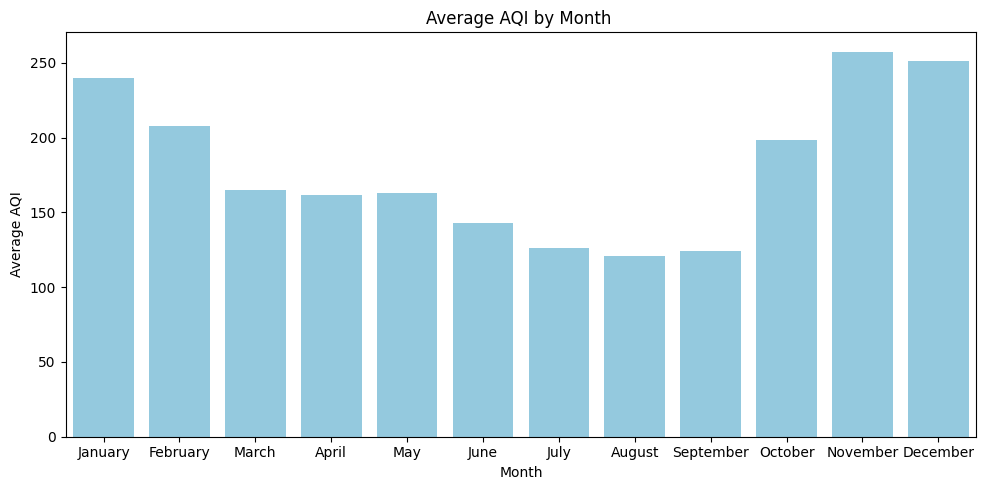

In [11]:
import calendar
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Month'].apply(lambda x: calendar.month_name[x])
# Group by Month number for correct order and get average AQI
monthly_avg = df.groupby('Month')[['AQI']].mean().reset_index()
monthly_avg['Month_Name'] = monthly_avg['Month'].apply(lambda x: calendar.month_name[x])

# Sort by month number
monthly_avg = monthly_avg.sort_values('Month')

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_avg, x='Month_Name', y='AQI', color='skyblue')
plt.title('Average AQI by Month ')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.tight_layout()
plt.show()

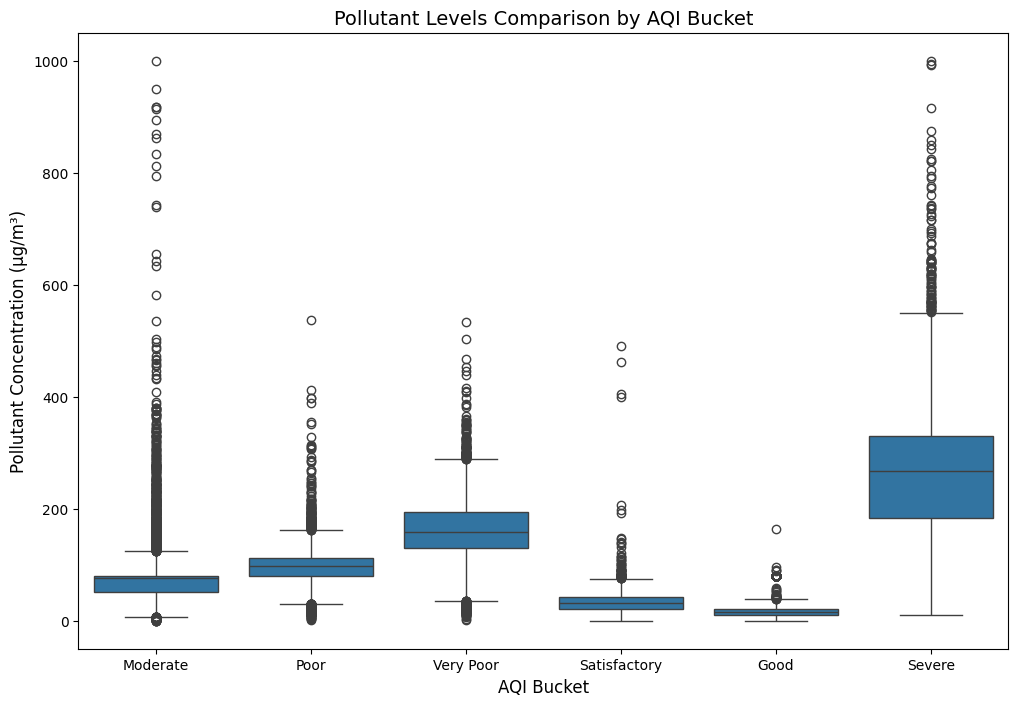

In [12]:
plt.figure(figsize=(12, 8))
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3', 'Benzene']
sns.boxplot(data=df, x='AQI_Bucket', y='PM2.5')
plt.title('Pollutant Levels Comparison by AQI Bucket', fontsize=14)
plt.xlabel('AQI Bucket', fontsize=12)
plt.ylabel('Pollutant Concentration (µg/m³)', fontsize=12)
plt.show()


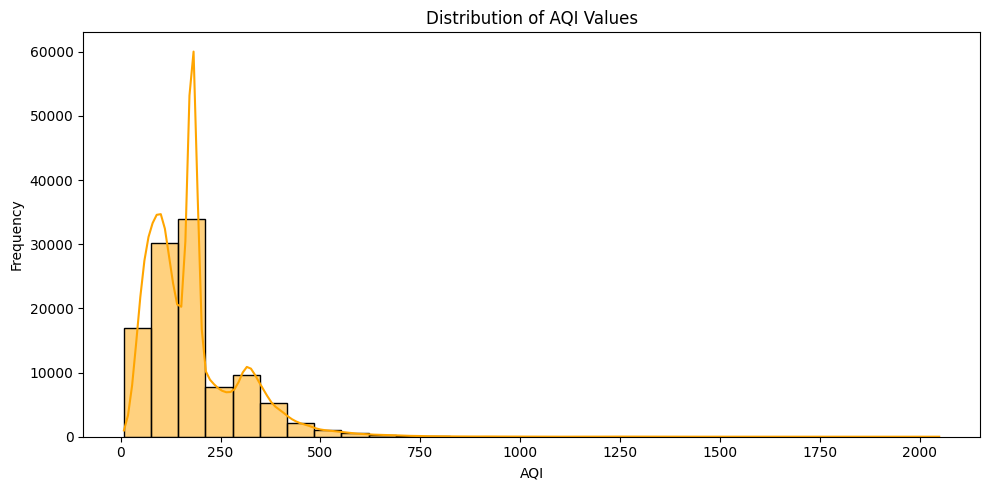

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df['AQI'], kde=True, color='orange', bins=30)
plt.title('Distribution of AQI Values')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


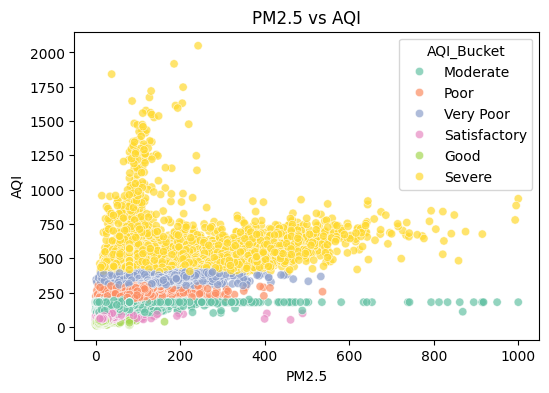

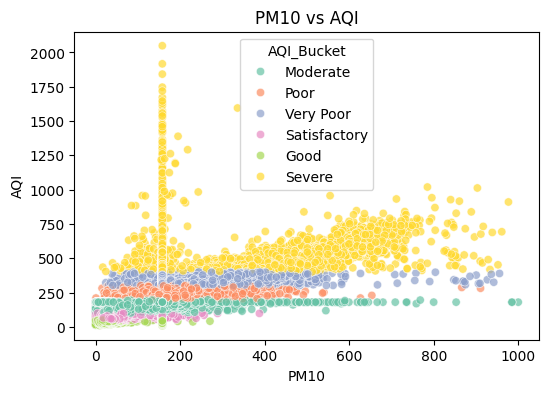

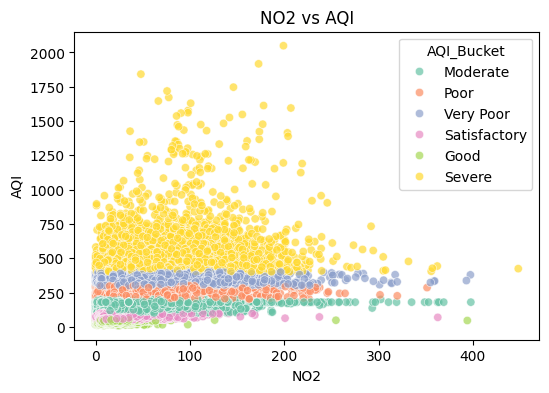

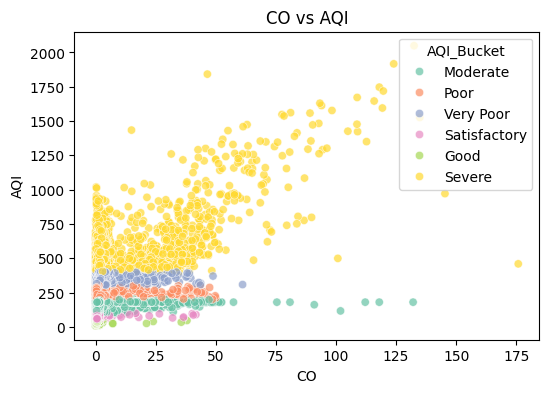

In [15]:
for pollutant in ['PM2.5', 'PM10', 'NO2', 'CO']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=pollutant, y='AQI', hue='AQI_Bucket', palette='Set2', alpha=0.7)
    plt.title(f'{pollutant} vs AQI')
    plt.show()
